#### ACTIVITY 2 (PART 2 OF 2) – PROPERTIES AND APPLICATIONS OF THE 2D FOURIER TRANSFORM

Andeo, Lovely\
2020-05405\
FX-2

**Activity 2.2.1 Rotation Property of the FT**

1. Create a 2D sinusoid using MATLAB in the X direction (similar to a corrugated roof).
2. Rotate the sinusoid and take its FFT (be sure to FFTshift!). Discuss what happens to its FT.
3. Create a pattern which is a combination of sinusoids in X and Y and observe its FT. For example, the code below is a product of two corrugated roofs, one running in the X-direction, the other in Y.
4. Add several rotated sinusoids of different frequencies to the pattern in 3 and observe the FT.

**Output**

First is to input all the necesssary libraries and packages needed.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps, ImageChops, ImageMath
from skimage import io
from scipy.signal import convolve2d
from skimage.io import imread
from scipy.ndimage import rotate
from scipy.fft import fft2, ifft2, fftshift

Similar to the very first activity, we create a sinusoid.

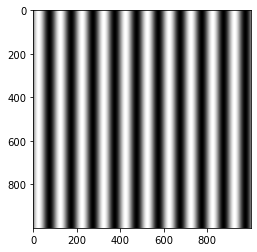

In [14]:
# Defining the parameters
amp1 = 1
wavelength1 = 10
freq1 = 2 * np.pi / wavelength1

# Creating the sinusoid
x = np.linspace(0, 100, 1000)
y = amp1 * np.sin(freq1 * x)
z = np.tile(y, (1000, 1))

# Plotting the 2D sinusoid
plt.imshow(z, cmap = 'gray')

Next, we observe what happens if we rotate the sinusoid

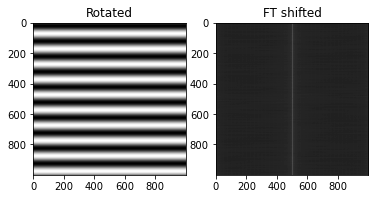

In [15]:
# Rotating the sinusoid by 90 degrees
z_rotated = rotate(z, angle=90, reshape=False)

# Taking its FFT
z_fft = fftshift(fft2(z_rotated))

# Plotting the rotated sinusoid and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(z_rotated, cmap='gray')
axs[0].set_title('Rotated')
axs[1].imshow(np.log(np.abs(z_fft)), cmap='gray')
axs[1].set_title('FT shifted')
plt.show()


Then, we add more sinusoids of different frequencies and observe what happens

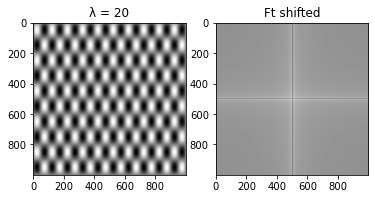

In [16]:
amp2 = 1
wavelength2 = 20
freq2 = 2 * np.pi / wavelength2

# Generating the arrays of X-axis and Y-axis values
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)

# Creating 1D sinusoids in x and y
sin_x = amp1 * np.sin(freq1 * x)
sin_y = amp2 * np.sin(freq2 * y)

# Taking the other product to make it 2D
pattern = np.outer(sin_y, sin_x)

# Taking the FFT and shifting the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Ploting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[0].set_title('λ = 20')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
axs[1].set_title('Ft shifted')
plt.show()


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_1234/1498871254.py:17: RuntimeWarning: divide by zero encountered in log
  axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')


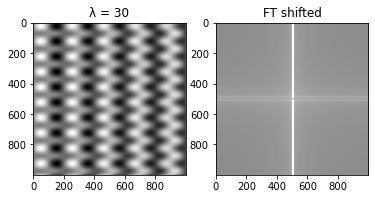

In [17]:
# Adding several rotated sinusoid of diff frequencies
amp3 = 1
wavelength3 = 30
freq3 = 2 * np.pi / wavelength3
sin1 = amp3 * np.sin(freq3 * (x * np.cos(np.pi/4) + y * np.sin(np.pi/4)))

# Combining the sinusoids to create the new pattern
pattern = sin_x[:, np.newaxis] * sin_y[np.newaxis, :] + sin1

# Taking the FFT of the pattern and shift the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Plotting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[0].set_title('λ = 30')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
axs[1].set_title('FT shifted')
plt.show()


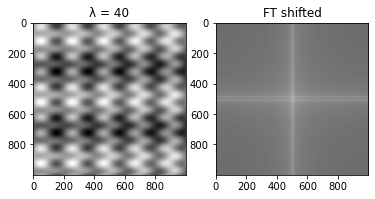

In [18]:
# Adding one more rotated sinusoid of diff frequencies
amp4 = 1
wavelength4 = 40
freq4 = 2 * np.pi / wavelength4
sin2 = amp4 * np.sin(freq4 * x)

# Combining the sinusoids to create the new pattern
pattern = sin_x[:, np.newaxis] * sin_y[np.newaxis, :] + sin1 + sin2[:, np.newaxis]

# Taking the FFT of the pattern and shift the zero frequency component to the center
pattern_fft = fftshift(fft2(pattern))

# Plotting the pattern and its FFT
fig, axs = plt.subplots(1, 2)
axs[0].imshow(pattern, cmap='gray')
axs[0].set_title('λ = 40')
axs[1].imshow(np.log(np.abs(pattern_fft)), cmap='gray')
axs[1].set_title('FT shifted')
plt.show()


**Activity 2.2.2 Application: Canvas Weave Modeling and Removal**

1. Open the image 185-8526.jpg and convert into a grayscale image. To enhance the detec- tion of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images. The image is from a painting by Dr. Vincent Daria.
2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.
3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks . Take the inverse FT of the filtered FT and overlay the filtered R,G,B images . Did the canvas weave vanish enough that the paint and brushstrokes remain?
4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Ob- serve the generated modulus image. Is it close to the appearance of the canvas weave?


**Extra Challenge 1**
Look for a material that has repeating texture and on top of it is a print, for example, ecobags with super- market logos, t-shirt with a brand, etc. Capture an image of the material with print or logo and filter out the texture. The resulting image should just be the print or logo.

**Extra Challenge 2**
Kaketsugi is the Japanese are of invisible mending. To repair a hole in a garment, a piece of fabric from the same garment is cut and patched onto the hole by painstakingly weaving the fabric into the hole fol- lowing the weave pattern of the cloth. Watch this youtube video to appreciate the art. Practitioners study the weaving pattern of different fabrics to inform the excution of their craft. Take a close-up image of a piece of fabric and take its FT. Filter out everything except the peaks corresponding to the weave pat- terns. Take the inverse FT of the filtered image. Does it look like an enhanced version of the weave pat- tern?

Convolving the two images (aperture with 10% of the array width)

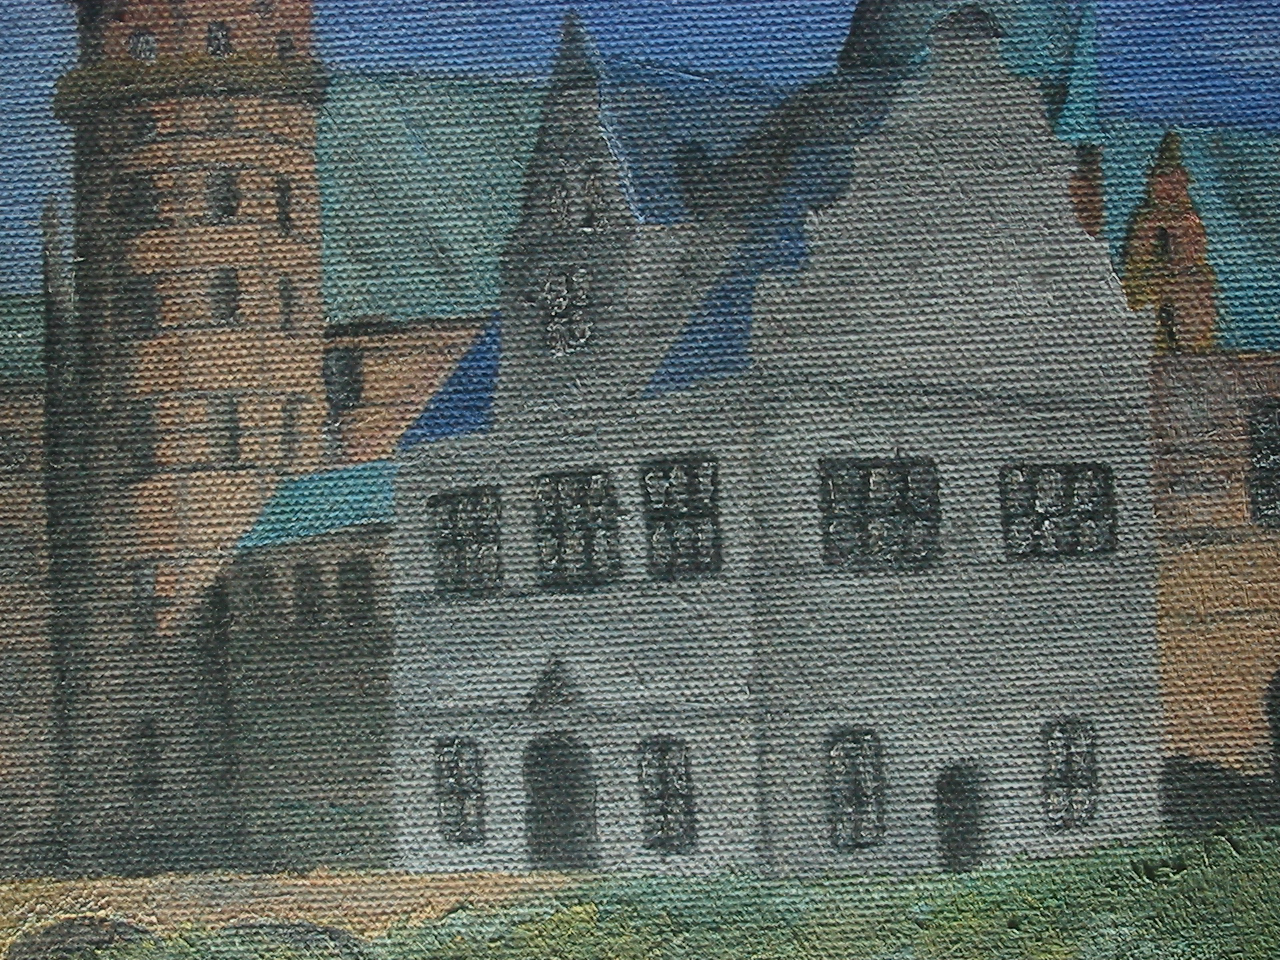

In [19]:
# Opening and converting the image to grayscale
img = Image.open('185-8526_IMG.JPG') 
Img_gray = Image.open('185-8526_IMG.JPG').convert('L')
Img_array = np.array(img)
img

Next is to take the FT of the mean-subtracted image to identify the peak value corresponding to the weave pattern in the canva

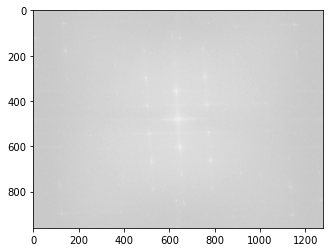

In [20]:
# Subtracting the mean from the image
mean_subtracted = np.array(Img_gray) - np.mean(np.array(Img_gray))

# Taking the FFT of the mean-subtracted image and shift the zero frequency component to the center
ft = fftshift(fft2(mean_subtracted))

# Plotting the FT
plt.imshow(np.log(abs(ft)), cmap='gray')
plt.show()


Then, we import the mask done using canva and convolve it with each of the color channels of the image.

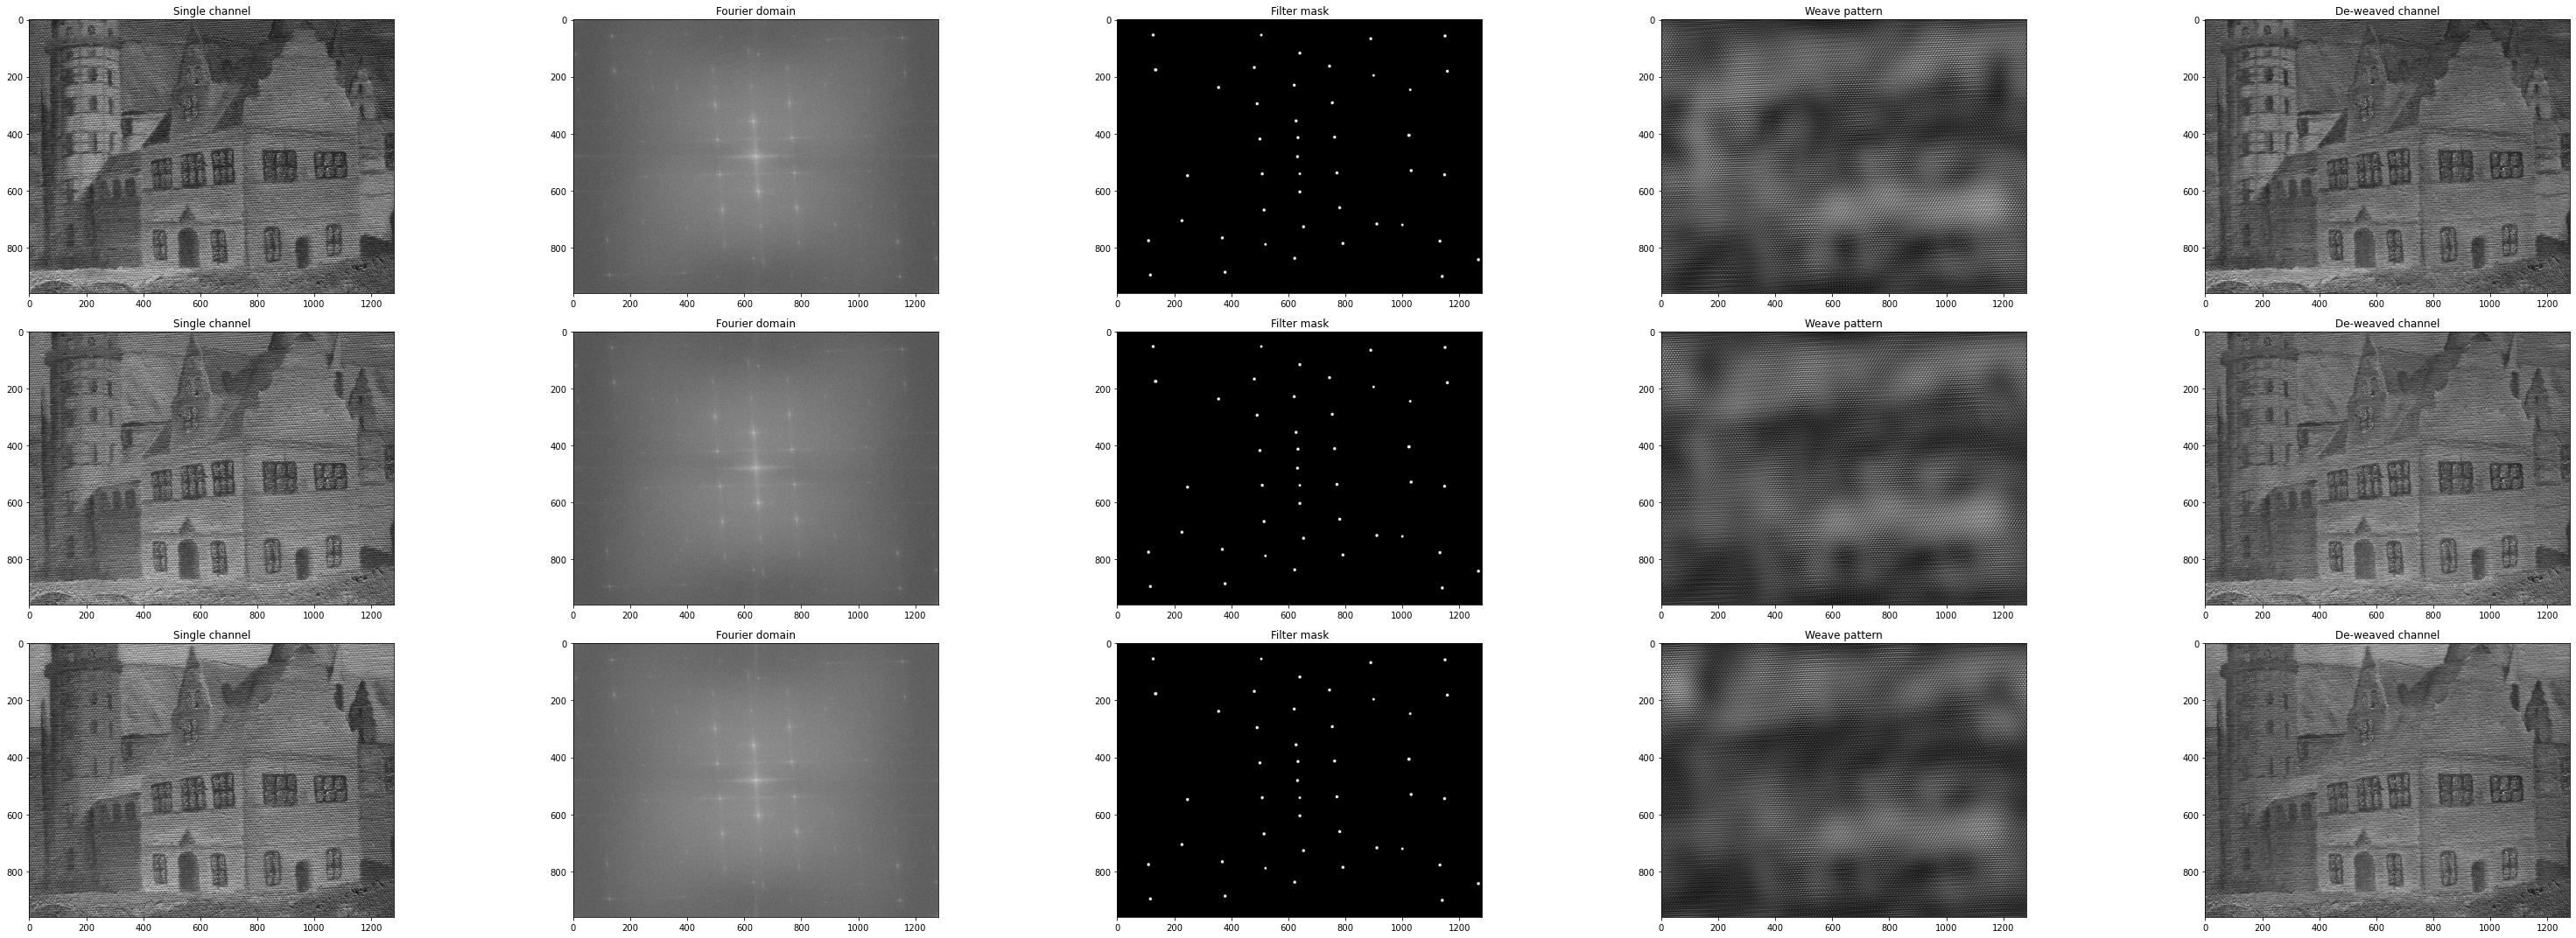

In [22]:
# Importing the images
painting = np.array(Image.open('185-8526_IMG.JPG')) 
mask_img = Image.open('mask.png')
mask_inv = 255 - np.array(mask_img)
mask_gray = np.array(Image.fromarray(mask_inv).convert('L'))
fig = plt.figure(figsize=(5*16/9*5, 5*3))

# Initializing array for each the channels
final = []

# Plotting
for i in range(3):

    ax = fig.add_subplot(3, 5, i*5 + 1)
    ax.imshow(painting[:,:,i], cmap='gray')
    ax.set_title("Single channel")

    ax = fig.add_subplot(3, 5, i*5 + 2)
    FD = np.fft.fft2(painting[:,:,i])
    ax.imshow(np.log10(np.fft.fftshift(abs(FD))), cmap='gray')
    ax.set_title("Fourier domain")
  
    ax = fig.add_subplot(3, 5, i*5 + 3)
    ax.imshow(Image.fromarray(mask_gray), cmap='gray')
    ax.set_title("Filter mask")
  
    ax = fig.add_subplot(3, 5, i*5 + 4)
    filt = FD * np.fft.fftshift(mask_gray)
    Icanvas = np.fft.ifft2(filt)
    ax.imshow(abs(Icanvas), cmap='gray')
    ax.set_title("Weave pattern")

    ax = fig.add_subplot(3, 5, i*5 + 5)
    mask = np.array(mask_gray, bool)           
    for i in range(mask_gray.size):
        mask.flat[i] = not mask_gray.flat[i]   
    clean = np.fft.fftshift(FD) * mask
    Iclean = np.fft.ifft2(clean)
    final.append(abs(Iclean))
    ax.imshow(abs(Iclean), cmap='gray')
    ax.set_title("De-weaved channel")

plt.tight_layout()
plt.show()

plt.show()

Comparing the original with the filtered image.

Text(0.5, 1.0, 'De-weaved painting')

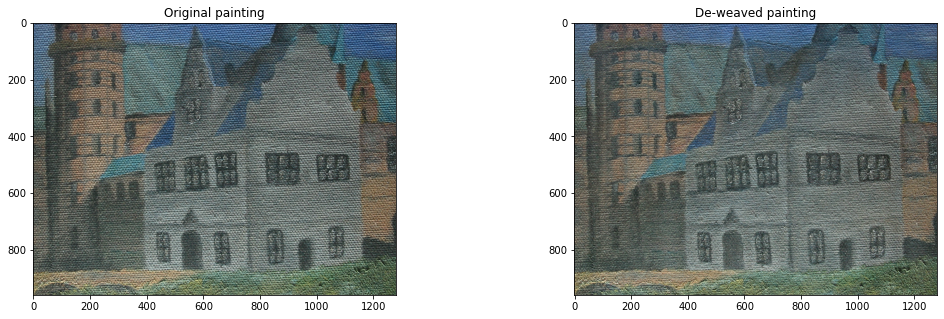

In [23]:
fig = plt.figure(figsize=(5*16/9*2, 5))

ax = fig.add_subplot(121)
ax.imshow(painting)
ax.set_title("Original painting")

ax = fig.add_subplot(122)
IA = np.array(final, "uint8").transpose(1,2,0)   
ax.imshow(IA)
ax.set_title("De-weaved painting")

**Activity 2.2.3. Convolution Theorem Redux**

1. Create a binary image of two dots (one pixel each) along the x-axis symmetric about center. Take the FT and display the modulus.
2. Replace the dots with circles of some radius. Discuss what you observe in the FT modulus as you vary the radius.
3. Replace the dots with squares of some width. Discuss what you observe in the FT modulus as you vary the width.
4. Create a 200×200 array of zeros. Put 10 1's in random locations in the array. These ones will ap- proximate dirac deltas. Call this array A. Create an arbitrary 9×9 pattern, call it d. Convolve A and d. What do you observe?
5. Create another 200×200 array of zeros but this time put equally spaced 1's along the x- and y-axis in the array. Get the FT and display the modulus. Change the spacing the 1's and repeat. Explain what you observe.

First is to create a binary image of two dots and get its FT.

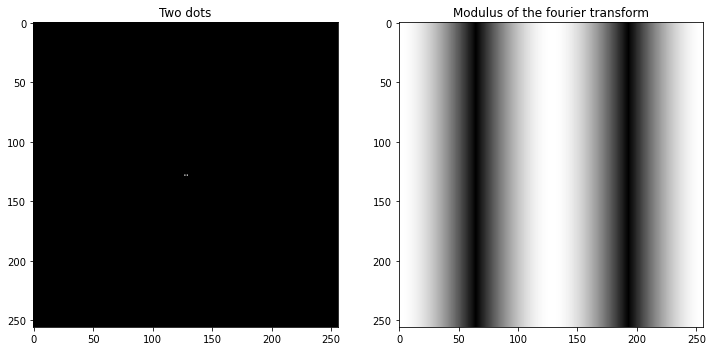

In [ ]:
# Creating a 2D binary image of two dots (one pixel each) symmetric about center along the x-axis
image1 = np.zeros((256, 256), dtype=np.uint8)
image1[128, 127] = 1
image1[128, 129] = 1

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(image1)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image1, cmap='gray')
axs[0].set_title('Two dots')
axs[1].imshow(modulus, cmap='gray')
axs[1].set_title('Modulus of the fourier transform')
plt.show()

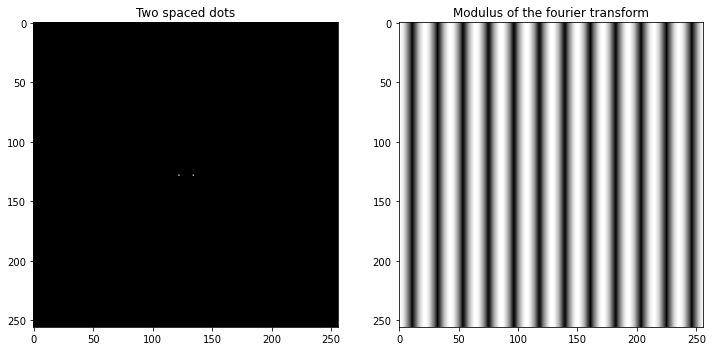

In [ ]:
# Creating a 2D binary image of two dots (one pixel each) symmetric about center along the x-axis
image1 = np.zeros((256, 256), dtype=np.uint8)
image1[128, 122] = 1
image1[128, 134] = 1

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(image1)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image1, cmap='gray')
axs[0].set_title('Two spaced dots')
axs[1].imshow(modulus, cmap='gray')
axs[1].set_title('Modulus of the fourier transform')
plt.show()

Then, the dots were replaced with circles of some radius

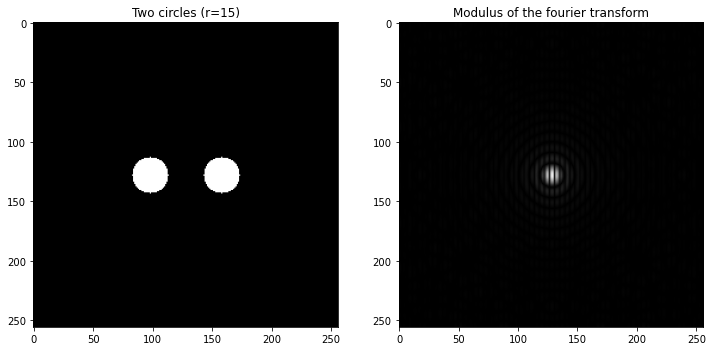

In [ ]:
# Creating binary image of two circles of radius 15 
img = np.zeros((256, 256))
x, y = np.meshgrid(np.arange(256), np.arange(256))
r1, r2 = 15, 15
center1, center2 = (98, 128), (158, 128)  # symmetric along the x-axis
circle1 = (x - center1[0])**2 + (y - center1[1])**2 <= r1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 <= r2**2
img = np.logical_or(circle1, circle2)

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(img)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Two circles (r=15)')
axs[1].imshow(modulus, cmap='gray')
axs[1].set_title('Modulus of the fourier transform')
plt.show()

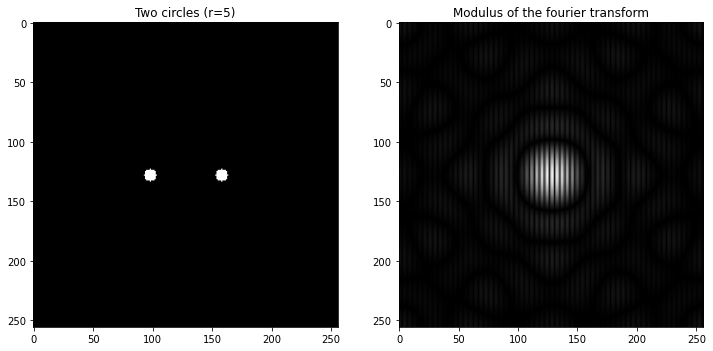

In [ ]:
# Creating binary image of two circles of radius 5 
img = np.zeros((256, 256))
x, y = np.meshgrid(np.arange(256), np.arange(256))
r1, r2 = 5, 5
center1, center2 = (98, 128), (158, 128)  # symmetric along the x-axis
circle1 = (x - center1[0])**2 + (y - center1[1])**2 <= r1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 <= r2**2
img = np.logical_or(circle1, circle2)

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(img)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Two circles (r=5)')
axs[1].imshow(modulus, cmap='gray')
axs[1].set_title('Modulus of the fourier transform')
plt.show()

Trying out the same thing, but now with squares of some width

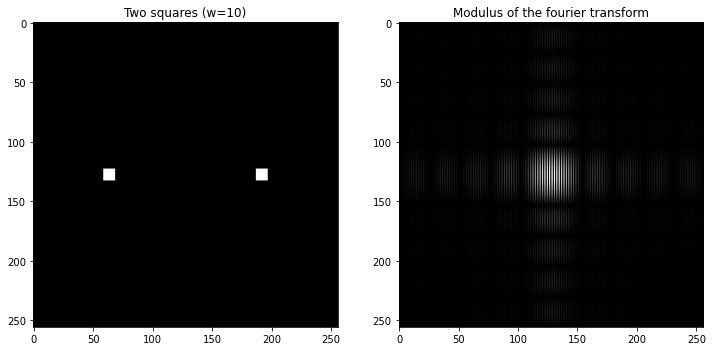

In [ ]:
# Defining the width of the squares
square_width = 10

# Creating 2D binary image of two squares along x-axis symmetric about center
image = np.zeros((256, 256))
image[128 - square_width//2:128 + square_width//2, 64 - square_width//2:64 + square_width//2] = 1
image[128 - square_width//2:128 + square_width//2, 192 - square_width//2:192 + square_width//2] = 1

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(image)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Two squares (w=10)')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the fourier transform')
plt.show()

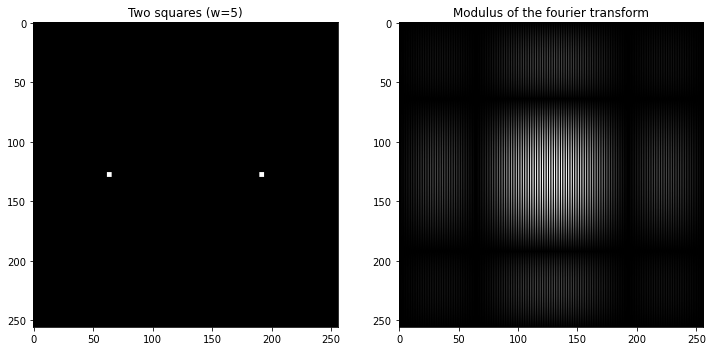

In [ ]:
# Defining the width of the squares
square_width = 5

# Creating 2D binary image of two squares along x-axis symmetric about center
image = np.zeros((256, 256))
image[128 - square_width//2:128 + square_width//2, 64 - square_width//2:64 + square_width//2] = 1
image[128 - square_width//2:128 + square_width//2, 192 - square_width//2:192 + square_width//2] = 1

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(image)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Two squares (w=5)')
axs[1].imshow(modulus, cmap='gray')
plt.title('Modulus of the fourier transform')
plt.show()

The next part of this activity is to create a 200×200 array of zeros, putting 10 1's in random locations in the array and approximating the dirac deltas.

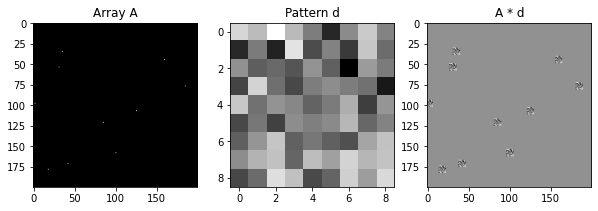

In [ ]:
# Creating a 200x200 array of zeros
A = np.zeros((200, 200))

# Generating 10 random indices
indices = np.random.randint(0, 200, (10, 2))

# Placing ones at the generated indices
for i, j in indices:
    A[i, j] = 1

# Creating an arbitrary 9x9 pattern
d = np.random.randn(9, 9)

# Convolving A and d using 'same' boundary conditions
result = convolve2d(A, d, mode='same', boundary='fill', fillvalue=0)

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Array A')

axs[1].imshow(d, cmap='gray')
axs[1].set_title('Pattern d')

axs[2].imshow(result, cmap='gray')
axs[2].set_title('A * d')

plt.show()


As observed, the pattern was just patched unto the locations of the dirac deltas in the original array.

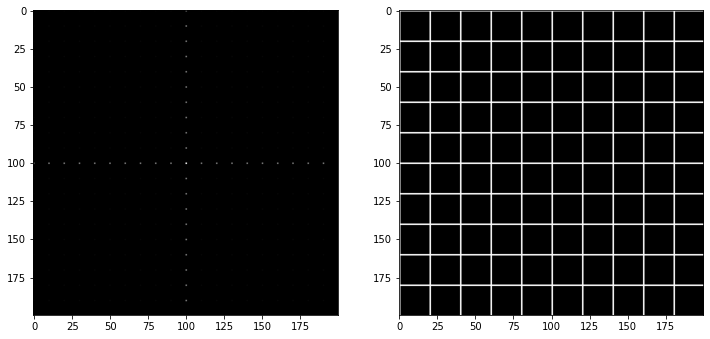

In [ ]:
# Creating a 200x200 array of zeros
image = np.zeros((200, 200))

# Putting equally spaced ones along the x- and y-axis
image[::20, :] = 1
image[:, ::20] = 1

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(image)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

# Displaying the modulus 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(modulus, cmap='gray')
axs[1].imshow(image, cmap='gray')
plt.show()


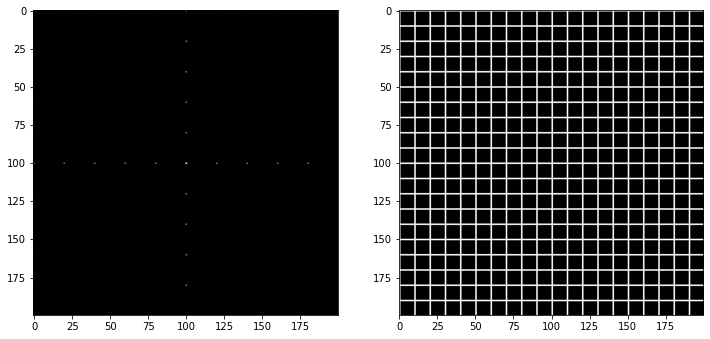

In [ ]:
# Creating a 200x200 array of zeros
image = np.zeros((200, 200))

# Putting equally spaced ones along the x- and y-axis
image[::10, :] = 1
image[:, ::10] = 1

# Taking the Fourier transform (FT) of the image
ft = np.fft.fft2(image)
ft = np.fft.fftshift(ft)
modulus = np.abs(ft)

# Displaying the modulus 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(modulus, cmap='gray')
axs[1].imshow(image, cmap='gray')
plt.show()


**Activity 2.2.4 Fingerprints : Ridge Enhancement**

1. Prepare an image of your own fingerprint in grayscale. You may do this by taking a picture of your stamped-ink fingerprint on paper. If you fail to prepare your own fingerprint, download grayscale images from the web. Make sure the image is NOT YET BINARIZED like the figure below. Remember to cite your sources, like Examples of different classes of fingerprints. (a) right loop (b) whorl... | Download Scientific Diagram (researchgate.net).
2. Open ithe image as grayscale and mean-center the grayvalues of the image.
3. Obtain the FT of the mean-centered grayscale image and investigate where the frequencies of the fingerprint ridges lie. Tip: The modulus of the FT image might span several orders of magnitude sp use the log scale to display the FT image.
4. Explain why the FT of fingerprints look the way they do.

Source of pictures: Alamy stock photos

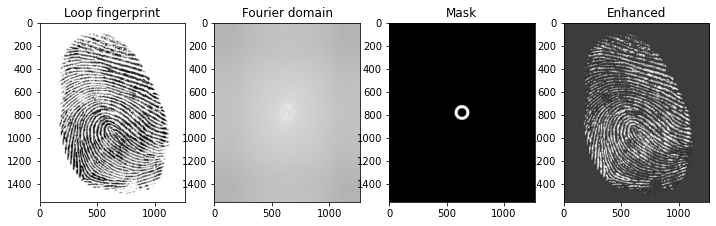

In [32]:
# Opening and converting the image and mask to grayscale
loop = Image.open('loop.png').convert('L')
loop_array = np.array(loop)
mask_img = Image.open('finger_mask.png').convert('L')
mask_inv = 255 - np.array(mask_img)
mask_gray = np.array(Image.fromarray(mask_inv))

# Getting the ft
loop_mean_centered = loop_array - np.mean(loop_array)
ft = np.fft.fft2(loop_mean_centered)
ft_shifted = np.fft.fftshift(ft)
magnitude_spectrum = np.abs(ft_shifted)

filt = ft_shifted * np.fft.fftshift(mask_gray)
filter = np.fft.ifft2(filt)

mask = np.array(mask_gray, bool)           
for i in range(mask_gray.size):
    mask.flat[i] = not mask_gray.flat[i]   
clean = np.fft.fftshift(ft_shifted) * mask
Iclean = np.fft.ifft2(clean)

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
axs[0].imshow(loop, cmap='gray')
axs[0].set_title('Loop fingerprint')
axs[1].imshow(np.log(magnitude_spectrum), cmap='gray')
axs[1].set_title('Fourier domain')
axs[2].imshow(mask_inv, cmap='gray')
axs[2].set_title('Mask')
axs[3].imshow(np.abs(Iclean), cmap='gray')
axs[3].set_title('Enhanced')
plt.show()

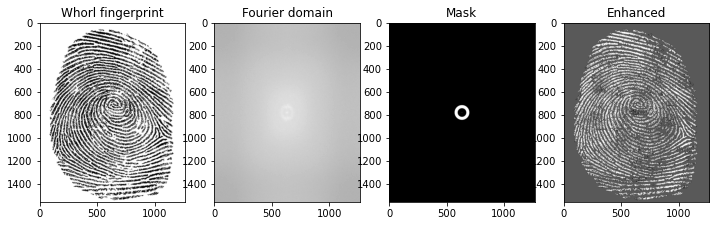

In [33]:
# Opening and converting the image to grayscale
whorl = Image.open('whorl.png').convert('L').resize((1268,1556))
whorl_array = np.array(whorl)

# Mean-center the image
whorl_mean_centered = whorl_array - np.mean(whorl_array)
ft = np.fft.fft2(whorl_mean_centered)
ft_shifted = np.fft.fftshift(ft)
magnitude_spectrum = np.abs(ft_shifted)

filt = ft_shifted * np.fft.fftshift(mask_gray)
filter = np.fft.ifft2(filt)

mask = np.array(mask_gray, bool)           
for i in range(mask_gray.size):
    mask.flat[i] = not mask_gray.flat[i]   
clean = np.fft.fftshift(ft_shifted) * mask
Iclean = np.fft.ifft2(clean)

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
axs[0].imshow(whorl, cmap='gray')
axs[0].set_title('Whorl fingerprint')
axs[1].imshow(np.log(magnitude_spectrum), cmap='gray')
axs[1].set_title('Fourier domain')
axs[2].imshow(mask_inv, cmap='gray')
axs[2].set_title('Mask')
axs[3].imshow(np.abs(Iclean), cmap='gray')
axs[3].set_title('Enhanced')
plt.show()


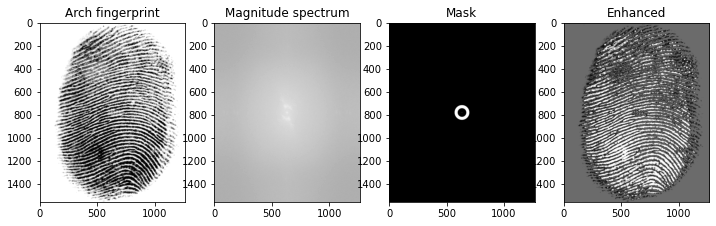

In [34]:
# Opening and converting the image to grayscale
arch = Image.open('arch.png').convert('L').resize((1268,1556))
arch_array = np.array(arch)

arch_mean_centered = arch_array - np.mean(arch_array)
ft = np.fft.fft2(arch_mean_centered)
ft_shifted = np.fft.fftshift(ft)
magnitude_spectrum = np.abs(ft_shifted)

filt = ft_shifted * np.fft.fftshift(mask_gray)
filter = np.fft.ifft2(filt)

mask = np.array(mask_gray, bool)           
for i in range(mask_gray.size):
    mask.flat[i] = not mask_gray.flat[i]   
clean = np.fft.fftshift(ft_shifted) * mask
Iclean = np.fft.ifft2(clean)

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
axs[0].imshow(arch, cmap='gray')
axs[0].set_title('Arch fingerprint')
axs[1].imshow(np.log(magnitude_spectrum), cmap='gray')
axs[1].set_title('Magnitude spectrum')
axs[2].imshow(mask_inv, cmap='gray')
axs[2].set_title('Mask')
axs[3].imshow(np.abs(Iclean), cmap='gray')
axs[3].set_title('Enhanced')
plt.show()

The ridges of the fingerprints became more defined!

**Activity 2.2.5 Lunar Landing Scanned Pictures : Line removal**

1. Download the image below from the website: 5. Apollo 11 site: High resolution vertical view (usra.edu)
2. Remove the vertical lines in the image by filtering in the Fourier Domain.

Lastly, we apply the same properties of the FT on a moon picture.

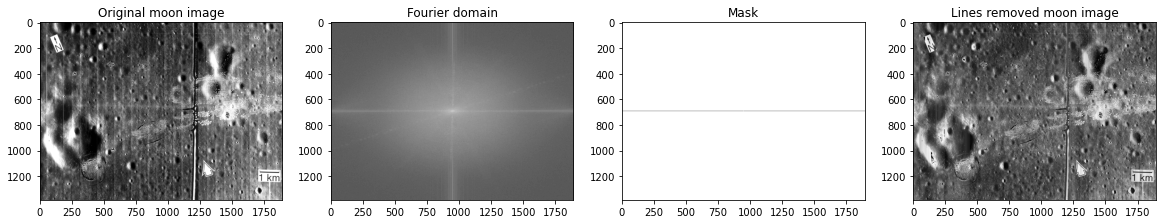

In [ ]:
# Opening and converting the image to grayscale
image = Image.open('ApolloLand05.tif').convert('L')
moon_array = np.array(image)

# Computing the Fourier transform of the image
f = np.fft.fft2(moon_array)

# Shifting the zero-frequency component to the center of the spectrum
fshift = np.fft.fftshift(f)

# Computing the magnitude spectrum of the Fourier transform
magnitude_spectrum = np.log(np.abs(fshift))

# Creating a mask to remove horizontal and vertical lines
rows, cols = moon_array.shape
crow, ccol = rows//2, cols//2
mask = np.ones((rows, cols), np.uint8)
mask[crow-1:crow+1, :] = 0
mask[:, ccol-1:ccol+1] = 1

# Applying the mask to the Fourier transform
fshift_masked = fshift * mask

# Shifting the zero-frequency component back to the top-left corner of the spectrum
f_ishift = np.fft.ifftshift(fshift_masked)

# Computing the inverse Fourier transform of the masked spectrum
img_lines_removed = np.fft.ifft2(f_ishift)
img_lines_removed = np.abs(img_lines_removed)

# Converting the image back to PIL Image object
img_lines_removed = Image.fromarray(img_lines_removed.astype(np.uint8))

# Ploting the results
fig, axs = plt.subplots(1, 4, figsize=(20, 12))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original moon image')

axs[1].imshow(magnitude_spectrum, cmap='gray')
axs[1].set_title('Fourier domain')

axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Mask')

axs[3].imshow(img_lines_removed, cmap='gray')
axs[3].set_title('Lines removed moon image')

plt.show()


As observed, the visibility of the vertical lines was definitely reduced or lessened.